🚨 Don't worry if the code block below doesn't make sense, please scroll down to the instructions below  🚨

In [2]:
# Setting up the notebook. 

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Dictionary mapping feature names to their descriptions
feature_descriptions = {
    'mean_radius': "Average distance from the center to the outer edge of the tumor.",
    'mean_texture': "How rough or smooth the surface of the tumor feels, on average.",
    'mean_perimeter': "The average length of the outline of the tumor.",
    'mean_area': "The average size of the surface of the tumor measured in square units.",
    'mean_smoothness': "How smooth or bumpy the tumor surface feels, averaged over several observations.",
    'mean_compactness': "A measure of how tightly the tumor cells are packed together, averaged over several observations.",
    'mean_concavity': "Average number of indentations or hollow areas on the tumor's surface.",
    'mean_concave_points': "Average number of sharp dips or points found along the contour of the tumor.",
    'mean_symmetry': "How evenly shaped the tumor is. A perfectly symmetrical tumor looks the same on both sides.",
    'mean_fractal_dimension': "A measure that describes the complexity of the tumor shape, showing how jagged the border is on average.",
    'radius_error': "The change in the tumor's radius across different measurements, indicating how much the size of the tumor varies.",
    'texture_error': "The change in the tumor's texture across different measurements, showing how much the roughness or smoothness varies.",
    'perimeter_error': "The change in the outline length of the tumor across different measurements, showing how much the outline varies.",
    'area_error': "The change in the surface size of the tumor across different measurements, showing how much the area varies.",
    'smoothness_error': "The change in how smooth or bumpy the tumor surface feels across different measurements.",
    'compactness_error': "The change in how tightly the tumor cells are packed together across different measurements.",
    'concavity_error': "The change in the number of indentations or hollow areas on the tumor's surface across different measurements.",
    'concave_points_error': "The change in the number of sharp dips or points found along the contour of the tumor across different measurements.",
    'symmetry_error': "The change in how evenly shaped the tumor is across different measurements.",
    'fractal_dimension_error': "The change in the complexity of the tumor shape across different measurements, showing how much the jaggedness of the border varies.",
    'worst_radius': "The largest distance from the center to the outer edge of the tumor observed among all measurements.",
    'worst_texture': "The roughest texture observed on the surface of the tumor.",
    'worst_perimeter': "The longest outline of the tumor measured among all observations.",
    'worst_area': "The largest surface area of the tumor measured among all observations.",
    'worst_smoothness': "The least smooth texture observed on the tumor's surface, indicating the roughest feel.",
    'worst_compactness': "The highest degree of how tightly the tumor cells are packed together, observed among all measurements.",
    'worst_concavity': "The deepest indentations observed on the tumor's surface.",
    'worst_concave_points': "The highest number of sharp dips or points observed along the contour of the tumor.",
    'worst_symmetry': "The most uneven shape observed in the tumor, where one side differs the most from the other.",
    'worst_fractal_dimension': "The highest complexity of the tumor shape observed, showing the most jagged border among all measurements."
}

def scatter_plot(X, y=None, line_plot=None, title='', show_legend=True, xlabel='', ylabel=''):
    """
    Create a scatter plot with optional labels, decision boundary, and filled areas.

    Parameters:
    X (dict): The data for the first class with keys 'data', 'color', and 'label'.
    y (dict, optional): The data for the second class with keys 'data', 'color', and 'label'.
    line_plot (dict, optional): The line plot details with keys 'x', 'y', 'color', 'linestyle', 'fill_colors', and 'model'.
    title (str): The title of the plot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    ylim (tuple, optional): The limits for the y-axis.
    show_legend (bool, optional): Whether to show the legend.
    """
    plt.figure(figsize=(8, 6))

    # Plotting the data points for X
    plt.scatter(X['data'][0], X['data'][1], color=X['color'], label=X["label"], edgecolors='k')
    
    # Plotting the data points for y, if provided
    if y is not None:
        plt.scatter(y['data'][0], y['data'][1], color=y['color'], label=y["label"], edgecolors='k')

    # Determining the ylim
    all_y_values = X['data'][1]
    if y is not None:
        all_y_values = np.concatenate([all_y_values, y['data'][1]])
    # if line_plot is not None:
    #     all_y_values = np.concatenate([all_y_values, line_plot["y"]])

    y_min, y_max = all_y_values.min(), all_y_values.max()
    y_range = y_max - y_min
    y_extension = y_range * 0.1  # 10% extension
    ylim = y_min - y_extension, y_max + y_extension
    plt.ylim(ylim)

    # Plotting the line plot
    if line_plot is not None:
        plt.plot(line_plot['x'], line_plot['y'], color=line_plot['color'], linestyle=line_plot['linestyle'], label='Decision Boundary')

        if 'fill_colors' in line_plot and ylim is not None:
            point_above = np.array([[line_plot['x'][0], line_plot['y'][0] + 1]])
            prediction_above = line_plot['model'].predict(point_above) if 'model' in line_plot else None

            if prediction_above == 1:
                plt.fill_between(line_plot['x'], line_plot['y'], ylim[1], color=line_plot['fill_colors'][1], alpha=0.2)
                plt.fill_between(line_plot['x'], ylim[0], line_plot['y'], color=line_plot['fill_colors'][0], alpha=0.2)
            else:
                plt.fill_between(line_plot['x'], line_plot['y'], ylim[1], color=line_plot['fill_colors'][0], alpha=0.2)
                plt.fill_between(line_plot['x'], ylim[0], line_plot['y'], color=line_plot['fill_colors'][1], alpha=0.2)

    # Setting the plot title and axis labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if show_legend and (X['label'] or (y and y['label'])):
        plt.legend()
    
    plt.show()

# Notebook Title: Exploring a Dataset with Regression

## Introduction
Welcome to Exercise 1! In this notebook, we will go through the importance of applying statistical concepts to our data problems and how to get meaningful answers to our questions using the power of programming. This module will help you understand many things about your data.

In the world of statistics, we use a tool called **regression** to help us answer such questions. Regression is a method used to find how one thing (like temperature) can predict another thing (like ice cream sales).

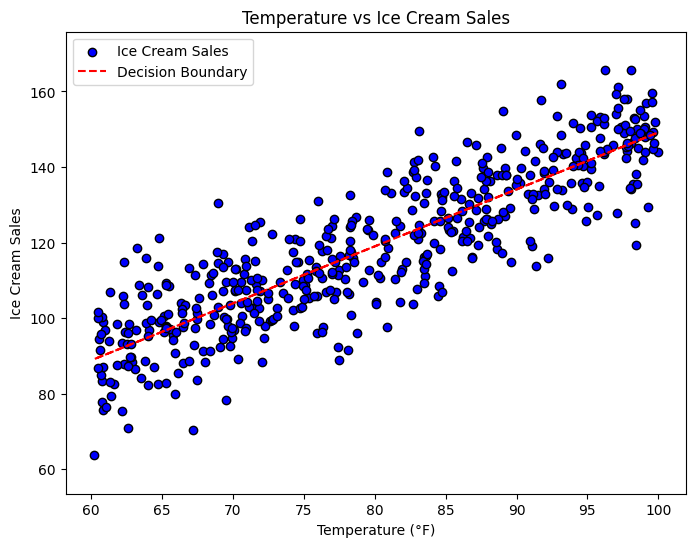

In [3]:
# Generate some made-up data
np.random.seed(0)
temperatures = np.random.uniform(60, 100, 500)  # Randomly choose temperatures between 60 and 100 degrees
ice_cream_sales = temperatures * 1.5 + np.random.normal(0, 10, 500)  # Randomly (kinda) choose sales made

# Reshape the temperatures for sklearn
temperatures_reshaped = temperatures.reshape(-1, 1)   # -1 represents the an unknown number that reshape will calculate based on the other dimension, which is 1 in this case

# Create a linear regression model
ice_cream_model = LinearRegression()
ice_cream_model.fit(temperatures_reshaped, ice_cream_sales)
predictions = ice_cream_model.predict(temperatures_reshaped)

# Plot the graph
scatter_plot(
    X={'data': [temperatures, ice_cream_sales], 'color': 'blue', 'label': 'Ice Cream Sales'}, 
    line_plot={'x': temperatures, 'y': predictions, 'color': 'red', 'linestyle': '--'},
    title='Temperature vs Ice Cream Sales',
    show_legend=True,
    xlabel='Temperature (°F)',
    ylabel='Ice Cream Sales'
)